# Building a simple neural-network with Keras

**Author: Xavier Snelgrove**

This is a simple quick-start in performing digit recognition in a neural network in Keras, for a short tutorial at the University of Toronto. It is largely based on the `mnist_mlp.py` example from the Keras source.

https://keras.io/

Keras is an open-source library for machine learning and neural networks, written in Python. It is designed as an interface at a higher level of abstraction than other similar lower-level libraries, and supports the TensorFlow, Microsoft Cognitive Toolkit (CNTK) and Theano libraries as backends. Designed to enable rapid prototyping of deep neural networks, it focuses on ease of use, modularity and extensibility. It was developed as part of the ONEIROS research project, and its lead author is François Chollet, from Google.

In 2017, the TensorFlow team decided to officially support Keras. Chollet explained that Keras was designed as an interface and not as a stand-alone library. It offers a set of modules that allow developing deep neural networks independently of the backend used, with a common and intuitive language[4]. Microsoft added a backend to CNTK starting with version 2.0 of CNTK

# MNIST database
The MNIST database (Modified National Institute of Standards and Technology database[1]) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.[4][5] It was created by "re-mixing" the samples from NIST's original datasets.[6] The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8%.

The original MNIST dataset contains at least 4 wrong labels.

![My Image](Images/nist1.jpg)


## Install prerequisites
First steps (instructions for Mac or Linux). You need to install a recent version of Python, plus the packages `keras`, `numpy`, `matplotlib` and `jupyter`.


## Time to build a neural network!
First let's import some prerequisites

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical  # ✅


## Load training data

In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


Let's look at some examples of the training data

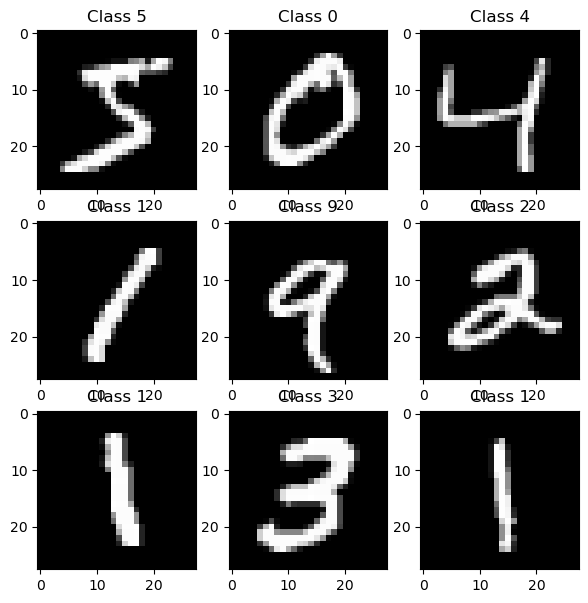

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [5]:
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

# Build the neural network
Build the neural-network. Here we'll do a simple 3 layer fully connected network.
<img src="figure.png" />

In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

/opt/anaconda3/envs/keras-env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the model
Keras is built on top of Theano (and now TensorFlow as well), both packages that allow you to define a *computation graph* in Python, which they then compile and run efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical crossentropy*, and is a loss function well-suited to comparing two probability distributions.

Here our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. [More detail at Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)

The optimizer helps determine how quickly the model learns, how resistent it is to getting "stuck" or "blowing up". We won't discuss this in too much detail, but "adam" is often a good choice (developed here at U of T).

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam')
#model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


## Train the model!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [8]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,  
          verbose=1,
          validation_data=(X_test, Y_test))


Epoch 1/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4494 - val_loss: 0.1033
Epoch 2/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1079 - val_loss: 0.0750
Epoch 3/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0687 - val_loss: 0.0731
Epoch 4/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0544 - val_loss: 0.0719


## Finally, evaluate its performance

In [9]:
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score)


Test loss: 0.07187318801879883


### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [11]:
# Ottieni le probabilità di ogni classe
predictions = model.predict(X_test)

# Estrai la classe con la probabilità più alta per ogni esempio
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step


In [12]:
# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

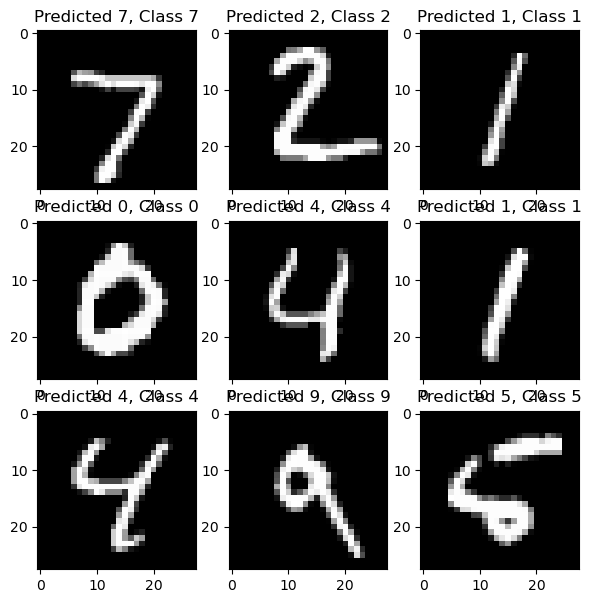

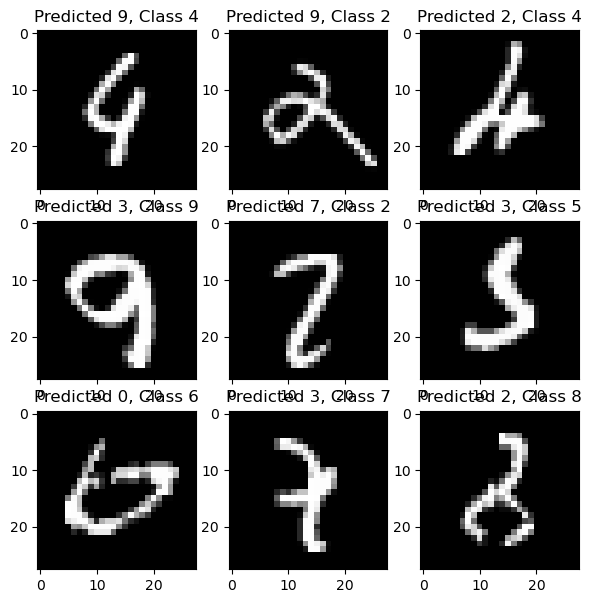

In [13]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

# That's all!

There are lots of other great examples at the Keras homepage at http://keras.io and in the source code at https://github.com/fchollet/keras